# The Sparks Foundation
#GRIP July 2021
# Data Science and Business Analytics 
#Task 1 - Prediction using Supervised ML


#Submitted By - Bhuvan Singh

**Task Details-**

* Predict the percentage of an student based on the no. of study hours. 

* This is a simple linear  regression task as it involves just 2 variables.

* You can use R, Python, SAS Enterprise Miner or any other tool 

* Data can be found at http: //bit.ly/w-data

* What will be predicted score if a student studies for 9.25 hrs/ day?








---






**Importing relevant libraries**

In [98]:
import numpy as np
import pandas as pd
import matplotlib .pyplot as plt
import seaborn as sns
%matplotlib inline

#using Scikit-Learn
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


**Importing Dataset from link**

In [99]:
data_set = pd.read_csv("http://bit.ly/w-data")
print("Data imported successfully")
print("First 5 rows of data")
data_set.head(5)

Data imported successfully
First 5 rows of data


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


**Info about the Data**

In [100]:
#rows and cols
data_set.shape

(25, 2)

In [101]:
#info of the data
data_set.info

<bound method DataFrame.info of     Hours  Scores
0     2.5      21
1     5.1      47
2     3.2      27
3     8.5      75
4     3.5      30
5     1.5      20
6     9.2      88
7     5.5      60
8     8.3      81
9     2.7      25
10    7.7      85
11    5.9      62
12    4.5      41
13    3.3      42
14    1.1      17
15    8.9      95
16    2.5      30
17    1.9      24
18    6.1      67
19    7.4      69
20    2.7      30
21    4.8      54
22    3.8      35
23    6.9      76
24    7.8      86>

In [102]:
#descibing the data
data_set.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


**Visualisations**

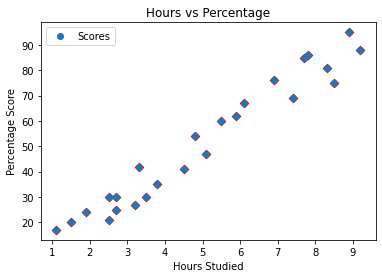

In [103]:
# Plotting the distribution of scores
data_set.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.scatter(data_set['Hours'],data_set['Scores'],color='red',marker='D')
plt.show()

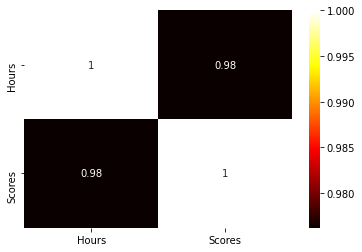

In [104]:
d=data_set.corr()
sns.heatmap(d,annot=True,cmap='hot')
plt.show()

From the scatter plot and the correlation plot, we can infer that there is a strong positive correlation. 

**Pre Processing the Data**

Dividing data into features(input) and labels(output)

In [105]:
X=data_set.iloc[:,:-1].values
y=data_set.iloc[:,1].values

Splitting into training and test sets

In [106]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.2, random_state=2) 

**Training the Linear Regression Model**

In [107]:
myModel = LinearRegression()  
myModel.fit(X_train, y_train) 

print("Training complete.")

Training complete.


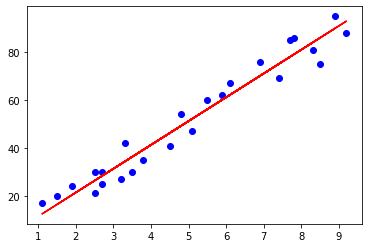

In [108]:
# Plotting the regression line
line = myModel.coef_*X+myModel.intercept_

# Plotting for the test data
plt.scatter(X, y, color='blue')
plt.plot(X, line,color = 'red');
plt.show()

**Predicting Scores**

In [109]:
y_pred = myModel.predict(X_test) 

In [110]:
# Comparing Actual vs Predicted
comp = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
comp

,Actual,Predicted
0,17,12.442587
1,21,26.359448
2,24,20.395079
3,88,92.961570
4,76,70.098155


**Predicting Score for 9.25 hours studied**

In [111]:
given_hours = 9.25
prediction =myModel.predict([[given_hours]])
print("No of Hours = {}".format(given_hours))
print("Predicted Score = {}".format(prediction[0]))
print('If a student studies for', f'{given_hours} hrs/day then the predicted score is',prediction,'%')

No of Hours = 9.25
Predicted Score = 93.45860055685799
If a student studies for 9.25 hrs/day then the predicted score is [93.45860056] %


**Evaluating our model**

In [112]:
from sklearn import metrics
print('Mean absolute error = ',metrics.mean_absolute_error(y_test,y_pred))
print('Mean squared error = ',metrics.mean_squared_error(y_test,y_pred))
print('Root Mean squared error = ',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
print('R2 Score = ',metrics.r2_score(y_test,y_pred))

Mean absolute error =  4.877039354964476
Mean squared error =  24.387620339856596
Root Mean squared error =  4.9383823606376005
R2 Score =  0.9735538080811826
